In [1]:
!unzip /content/drive/MyDrive/AprendizajeAutomatico/archive.zip

Archive:  /content/drive/MyDrive/AprendizajeAutomatico/archive.zip
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv  


In [2]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [3]:
#Importamos los datos
data=pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Vemos la clase de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [5]:
#Seguimos analizando nuestros datos
data.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [6]:
#Buscamos valores nulos y los sumamos para ver cuántos tenemos en cada columna
print(data.isnull().sum())

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64


In [7]:
#Reemplazamos los valores nulos con la media de cada variable
data['Open'].fillna(data['Open'].mean(), inplace=True)
data['High'].fillna(data['High'].mean(), inplace=True)
data['Low'].fillna(data['Low'].mean(), inplace=True)
data['Close'].fillna(data['Close'].mean(), inplace=True)
data['Volume_(BTC)'].fillna(data['Volume_(BTC)'].mean(), inplace=True)
data['Volume_(Currency)'].fillna(data['Volume_(Currency)'].mean(), inplace=True)
data['Weighted_Price'].fillna(data['Weighted_Price'].mean(), inplace=True)

In [8]:
#Volvemos a mirar si hay valores nulos y vemos que ya no los hay
print(data.isnull().sum())

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [9]:
#Mostramos en pantalla nuestros datos
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39000,4.390000,4.390000,4.390000,0.455581,2.000000,4.3900
1,1325317980,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.9348
2,1325318040,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.9348
3,1325318100,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.9348
4,1325318160,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.9348


In [10]:
#Cambiamos el formato de la fecha
data['Timestamp'] = pd.to_datetime(data['Timestamp'],unit='s')
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39000,4.390000,4.390000,4.390000,0.455581,2.000000,4.390000
1,2011-12-31 07:53:00,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.934800
2,2011-12-31 07:54:00,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.934800
3,2011-12-31 07:55:00,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.934800
4,2011-12-31 07:56:00,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.934800
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31000,58714.310000,58686.000000,58686.000000,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97000,58693.430000,58683.970000,58685.810000,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43000,58723.840000,58693.430000,58723.840000,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18000,58770.380000,58742.180000,58760.590000,0.720415,42332.958633,58761.866202


In [11]:
#Creamos una nueva columna en la que solo aparezca el año y otra en la que solo aparezca el mes
data['year'] = data['Timestamp'].dt.year
data['month'] = data['Timestamp'].dt.month
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month
0,2011-12-31 07:52:00,4.39000,4.390000,4.390000,4.390000,0.455581,2.000000,4.390000,2011,12
1,2011-12-31 07:53:00,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.934800,2011,12
2,2011-12-31 07:54:00,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.934800,2011,12
3,2011-12-31 07:55:00,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.934800,2011,12
4,2011-12-31 07:56:00,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.934800,2011,12
...,...,...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31000,58714.310000,58686.000000,58686.000000,1.384487,81259.372187,58692.753339,2021,3
4857373,2021-03-30 23:57:00,58683.97000,58693.430000,58683.970000,58685.810000,7.294848,428158.146640,58693.226508,2021,3
4857374,2021-03-30 23:58:00,58693.43000,58723.840000,58693.430000,58723.840000,1.705682,100117.070370,58696.198496,2021,3
4857375,2021-03-30 23:59:00,58742.18000,58770.380000,58742.180000,58760.590000,0.720415,42332.958633,58761.866202,2021,3


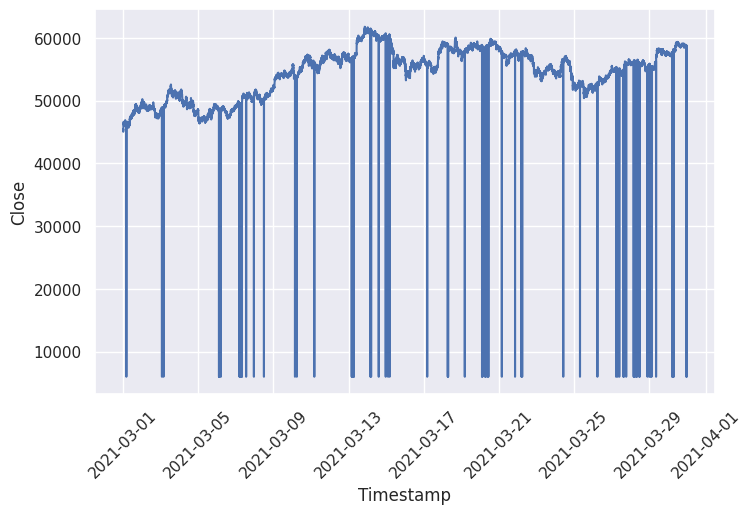

In [12]:
#Visualizamos los datos del año 2021 y el mes 3 (marzo)
bitcoin_2021 = data[(data['year'] == 2021) & (data['month'] == 3)]

plt.figure(figsize=(8, 5))
sns.lineplot(data = bitcoin_2021, x = 'Timestamp', y = 'Close')
plt.xticks(rotation=45);

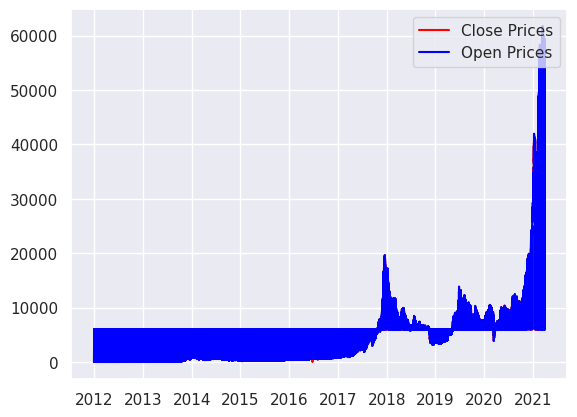

In [13]:
#Comparamos los datos de 'Close' con los datos de 'Open' en función del tiempo
plt.plot(data['Timestamp'], data['Close'], color = 'red', label = 'Close Prices')
plt.plot( data['Timestamp'], data['Open'], color = 'blue', label = 'Open Prices')
plt.legend(loc='upper right')
plt.show()

Las variables 'Close' y 'Open' tienen el mismo gráfico, así que trabajaremos con la variable 'Close'

In [14]:
#Moving Average
# Calculemos el 'moving average' que es una ventana que se va trasladando por la variable 'Close'
window = 24
data['Moving_Avg'] = data['Close'].rolling(window=window).mean()

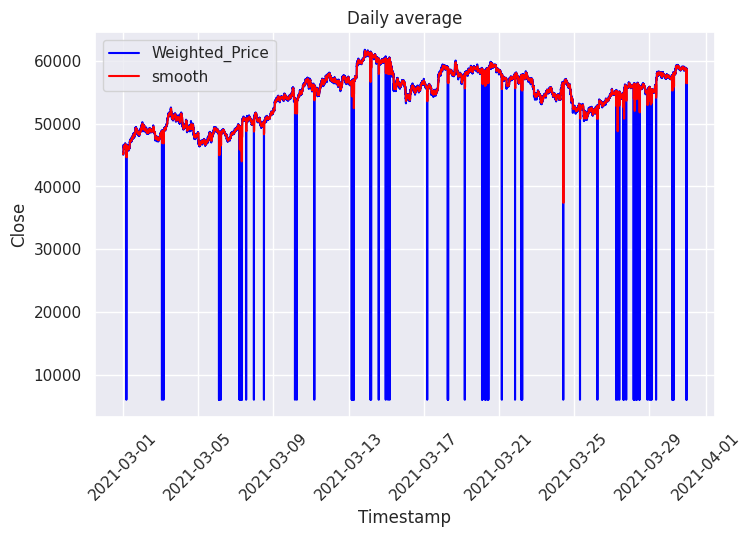

In [15]:
#Visualizamos la nueva variable con la variable 'Close' de nuevo en el año 2021 y en el mes 3 (marzo)
bitcoin_2021 = data[(data['year'] == 2021) & (data['month'] == 3)]

plt.figure(figsize=(8, 5))
sns.lineplot(data = bitcoin_2021, x = 'Timestamp', y = 'Close', c = 'blue', label = 'Weighted_Price')
sns.lineplot(data = bitcoin_2021, x = 'Timestamp', y = 'Moving_Avg', c = 'red', label = 'smooth')
plt.title('Daily average')
plt.legend()
plt.xticks(rotation=45);

###Exponential Smoothing

In [16]:
#Hacemos un suavizado exponencial
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):

    plt.figure(figsize=(8, 5))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

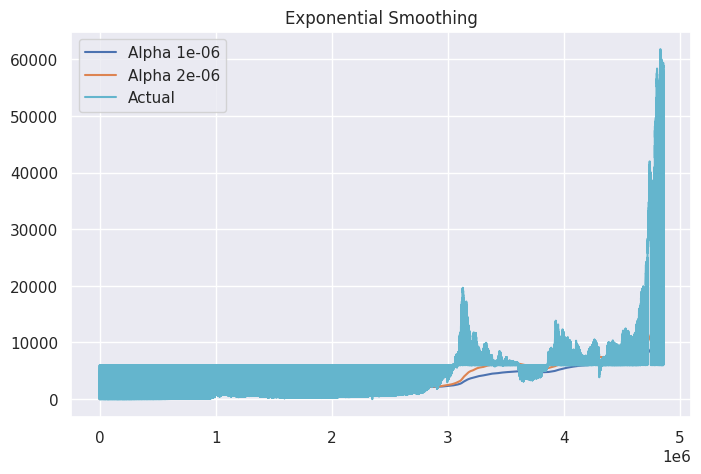

In [17]:
#Visualizamos
plot_exponential_smoothing(data.Close, [0.000001, 0.000002])

### Train test Split

In [18]:
#Visualizamos las columnas
data.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price', 'year', 'month', 'Moving_Avg'],
      dtype='object')

In [19]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,Moving_Avg
0,2011-12-31 07:52:00,4.39000,4.390000,4.390000,4.390000,0.455581,2.000000,4.3900,2011,12,NaN
1,2011-12-31 07:53:00,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.9348,2011,12,NaN
2,2011-12-31 07:54:00,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.9348,2011,12,NaN
3,2011-12-31 07:55:00,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.9348,2011,12,NaN
4,2011-12-31 07:56:00,6009.02368,6013.357082,6004.488004,6009.013545,9.323249,41762.842397,6008.9348,2011,12,NaN


In [20]:
#Escalamos la columna de la variable 'Close'
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
close_price = data.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [21]:
#Dividimos los datos en secuencias de periodos más cortos; en este caso, estoy configurando
#la longitud de la secuencia en 90.
seq_len = 90

def split_into_sequences(data, seq_len):
    n_seq = int(len(data)/200) - seq_len + 1 #Dividimos los datos entre 200 para reducir la cantidad de datos y poder hacer un entrenamiento más rápido y mejor
    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])

def get_train_test_sets(data, seq_len, train_frac):
    sequences = split_into_sequences(data, seq_len)
    n_train = int(sequences.shape[0] * train_frac)
    x_train = sequences[:n_train, :-1, :]
    y_train = sequences[:n_train, -1, :]
    x_test = sequences[n_train:, :-1, :]
    y_test = sequences[n_train:, -1, :]
    return x_train, y_train, x_test, y_test

#Únicamente utilizamos la columna 'Close' para la predicción
x_train, y_train, x_test, y_test = get_train_test_sets(scaled_close, seq_len, train_frac=0.2)

In [22]:
#vemos las dimensiones
print(y_train.shape)
print(y_test.shape)

print(x_train.shape)
print(y_train.shape)
print(x_train)

(4839, 1)
(19358, 1)
(4839, 89, 1)
(4839, 1)
[[[4.67786657e-05]
  [9.72399542e-02]
  [9.72399542e-02]
  ...
  [9.72399542e-02]
  [9.72399542e-02]
  [9.72399542e-02]]

 [[9.72399542e-02]
  [9.72399542e-02]
  [9.72399542e-02]
  ...
  [9.72399542e-02]
  [9.72399542e-02]
  [9.72399542e-02]]

 [[9.72399542e-02]
  [9.72399542e-02]
  [9.72399542e-02]
  ...
  [9.72399542e-02]
  [9.72399542e-02]
  [9.72399542e-02]]

 ...

 [[9.72399542e-02]
  [9.72399542e-02]
  [9.72399542e-02]
  ...
  [9.72399542e-02]
  [9.72399542e-02]
  [9.72399542e-02]]

 [[9.72399542e-02]
  [9.72399542e-02]
  [9.72399542e-02]
  ...
  [9.72399542e-02]
  [9.72399542e-02]
  [9.72399542e-02]]

 [[9.72399542e-02]
  [9.72399542e-02]
  [9.72399542e-02]
  ...
  [9.72399542e-02]
  [9.72399542e-02]
  [9.72399542e-02]]]


### Redes Neuronales Recurrentes

In [23]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import SimpleRNN

#89=seq_len-1
model = Sequential()
model.add(SimpleRNN(89, return_sequences=True, input_shape=(89, x_train.shape[-1]))) #Devuelve una secuencia de vectores
model.add(SimpleRNN(89)) #Devuelve solamente un vector, por eso no es necesario Flatten()
model.add(Dense(1)) #Función de activación linear que es la que se pone por defecto

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 89, 89)            8099      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 89)                15931     
                                                                 
 dense (Dense)               (None, 1)                 90        
                                                                 
Total params: 24120 (94.22 KB)
Trainable params: 24120 (94.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# compilamos el modelo
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['MAE'])

In [26]:
history= model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
121/121 [==============================] - 9s 59ms/step - loss: 0.0126 - MAE: 0.0583 - val_loss: 3.9254e-04 - val_MAE: 0.0093
Epoch 2/10
121/121 [==============================] - 6s 53ms/step - loss: 1.0444e-04 - MAE: 0.0042 - val_loss: 3.4565e-04 - val_MAE: 0.0113
Epoch 3/10
121/121 [==============================] - 7s 57ms/step - loss: 8.4260e-05 - MAE: 0.0040 - val_loss: 2.6170e-04 - val_MAE: 0.0090
Epoch 4/10
121/121 [==============================] - 5s 39ms/step - loss: 6.9772e-05 - MAE: 0.0038 - val_loss: 2.2387e-04 - val_MAE: 0.0070
Epoch 5/10
121/121 [==============================] - 6s 46ms/step - loss: 6.8349e-05 - MAE: 0.0046 - val_loss: 1.9466e-04 - val_MAE: 0.0057
Epoch 6/10
121/121 [==============================] - 6s 48ms/step - loss: 5.2981e-05 - MAE: 0.0033 - val_loss: 1.7837e-04 - val_MAE: 0.0059
Epoch 7/10
121/121 [==============================] - 5s 39ms/step - loss: 5.0586e-05 - MAE: 0.0036 - val_loss: 1.6983e-04 - val_MAE: 0.0075
Epoch 8/10
121/12

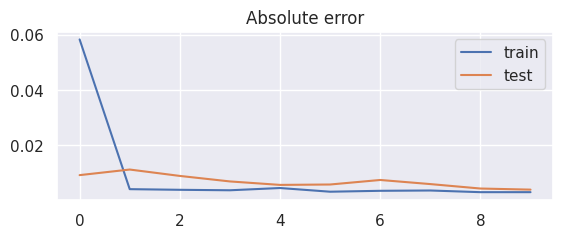

In [27]:
#Visualizamos la gráfica de 'MAE' entrenada y validada
from matplotlib import pyplot

pyplot.subplot(211)
pyplot.title('Absolute error')
pyplot.plot(history.history['MAE'], label='train')
pyplot.plot(history.history['val_MAE'], label='test')
pyplot.legend()

In [28]:
# evaluamos el modelo
_, mae_tr= model.evaluate(x_train, y_train)
_, mae_ts= model.evaluate(x_test, y_test)
print('MAE train: %.5f' % mae_tr)
print('MAE test: %.5f' % mae_ts)

605/605 [==============================] - 7s 11ms/step - loss: 2.1722e-04 - MAE: 0.0049
MAE train: 0.00193
MAE test: 0.00491


### Redes Neuronales Recurrentes: Intentar mejorar

In [29]:
from keras.layers import Dropout

#89=seq_len-1
model2 = Sequential()
model2.add(SimpleRNN(89, return_sequences=True, input_shape=(89, x_train.shape[-1])))
model2.add(Dropout(0.2)) #añadimos Dropout() para ver si mejoramos
model2.add(SimpleRNN(89, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(SimpleRNN(89))
model2.add(Dense(1)) #Función de activación linear que es la que se pone por defecto

In [30]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 89, 89)            8099      
                                                                 
 dropout (Dropout)           (None, 89, 89)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 89, 89)            15931     
                                                                 
 dropout_1 (Dropout)         (None, 89, 89)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 89)                15931     
                                                                 
 dense_1 (Dense)             (None, 1)                 90        
                                                                 
Total params: 40051 (156.45 KB)
Trainable params: 4005

In [31]:
# compilamos el modelo
model2.compile(loss='mean_squared_error', optimizer='Adam', metrics=['MAE'])

In [32]:
history2= model2.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
121/121 [==============================] - 13s 80ms/step - loss: 0.0282 - MAE: 0.1039 - val_loss: 1.5951e-04 - val_MAE: 0.0069
Epoch 2/10
121/121 [==============================] - 10s 84ms/step - loss: 0.0010 - MAE: 0.0252 - val_loss: 1.3181e-04 - val_MAE: 0.0042
Epoch 3/10
121/121 [==============================] - 10s 79ms/step - loss: 4.9305e-04 - MAE: 0.0176 - val_loss: 8.7193e-04 - val_MAE: 0.0276
Epoch 4/10
121/121 [==============================] - 9s 73ms/step - loss: 3.3143e-04 - MAE: 0.0140 - val_loss: 3.6230e-04 - val_MAE: 0.0163
Epoch 5/10
121/121 [==============================] - 11s 95ms/step - loss: 2.3654e-04 - MAE: 0.0119 - val_loss: 3.0559e-04 - val_MAE: 0.0146
Epoch 6/10
121/121 [==============================] - 11s 91ms/step - loss: 1.8936e-04 - MAE: 0.0106 - val_loss: 9.2399e-05 - val_MAE: 0.0025
Epoch 7/10
121/121 [==============================] - 8s 68ms/step - loss: 1.3998e-04 - MAE: 0.0090 - val_loss: 9.7584e-05 - val_MAE: 0.0032
Epoch 8/10
121/1

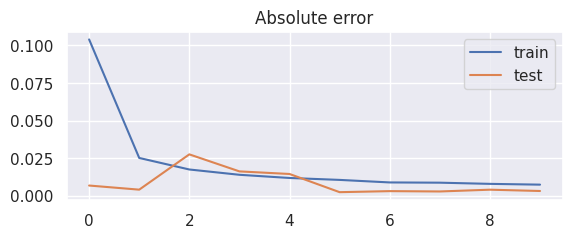

In [33]:
#Visualizamos la gráfica de 'MAE' entrenada y validada
from matplotlib import pyplot

pyplot.subplot(211)
pyplot.title('Absolute error')
pyplot.plot(history2.history['MAE'], label='train')
pyplot.plot(history2.history['val_MAE'], label='test')
pyplot.legend()

In [34]:
# evaluamos el modelo
_, mae_tr= model2.evaluate(x_train, y_train)
_, mae_ts= model2.evaluate(x_test, y_test)
print('MAE train: %.5f' % mae_tr)
print('MAE test: %.5f' % mae_ts)

605/605 [==============================] - 12s 20ms/step - loss: 3.0089e-04 - MAE: 0.0050
MAE train: 0.00244
MAE test: 0.00499


### Redes LSTM

In [35]:
from keras.layers import LSTM

#89=seq_len-1
model3 = Sequential()
model3.add(LSTM(89, return_sequences=True, input_shape=(89, x_train.shape[-1])))
model3.add(LSTM(89, return_sequences=True))
model3.add(LSTM(89))
model3.add(Dense(1)) #Función de activación linear que es la que se pone por defecto

In [36]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 89, 89)            32396     
                                                                 
 lstm_1 (LSTM)               (None, 89, 89)            63724     
                                                                 
 lstm_2 (LSTM)               (None, 89)                63724     
                                                                 
 dense_2 (Dense)             (None, 1)                 90        
                                                                 
Total params: 159934 (624.74 KB)
Trainable params: 159934 (624.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# compilamos el modelo
model3.compile(loss='mean_squared_error', optimizer='Adam', metrics=['MAE'])

In [38]:
history3= model3.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
121/121 [==============================] - 31s 201ms/step - loss: 2.0166e-04 - MAE: 0.0057 - val_loss: 7.7523e-05 - val_MAE: 0.0010
Epoch 2/10
121/121 [==============================] - 26s 215ms/step - loss: 1.8122e-05 - MAE: 9.4374e-04 - val_loss: 7.7349e-05 - val_MAE: 0.0010
Epoch 3/10
121/121 [==============================] - 26s 216ms/step - loss: 1.8611e-05 - MAE: 0.0010 - val_loss: 7.7310e-05 - val_MAE: 0.0011
Epoch 4/10
121/121 [==============================] - 22s 183ms/step - loss: 1.8264e-05 - MAE: 0.0011 - val_loss: 7.8252e-05 - val_MAE: 0.0013
Epoch 5/10
121/121 [==============================] - 24s 197ms/step - loss: 1.7946e-05 - MAE: 8.9389e-04 - val_loss: 7.8863e-05 - val_MAE: 0.0015
Epoch 6/10
121/121 [==============================] - 24s 195ms/step - loss: 1.8592e-05 - MAE: 0.0010 - val_loss: 7.9419e-05 - val_MAE: 0.0017
Epoch 7/10
121/121 [==============================] - 23s 193ms/step - loss: 1.8567e-05 - MAE: 0.0012 - val_loss: 7.7267e-05 - val_MAE

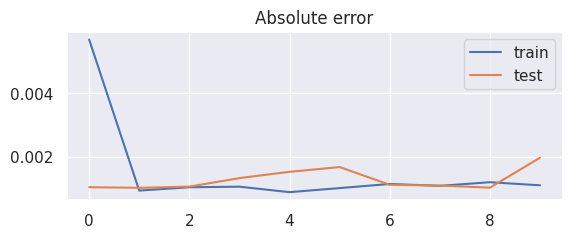

In [39]:
#Visualizamos la gráfica de 'MAE' entrenada y validada
from matplotlib import pyplot

pyplot.subplot(211)
pyplot.title('Absolute error')
pyplot.plot(history3.history['MAE'], label='train')
pyplot.plot(history3.history['val_MAE'], label='test')
pyplot.legend()

In [40]:
# evaluamos el modelo
_, mae_tr= model3.evaluate(x_train, y_train)
_, mae_ts= model3.evaluate(x_test, y_test)
print('MAE train: %.5f' % mae_tr)
print('MAE test: %.5f' % mae_ts)

605/605 [==============================] - 32s 53ms/step - loss: 1.0497e-04 - MAE: 0.0023
MAE train: 0.00141
MAE test: 0.00230


### Redes Gated Recurrent Unit (GRU)

In [41]:
from keras.layers import GRU

#89=seq_len-1
model4 = Sequential()
model4.add(GRU(89, return_sequences=True, input_shape=(89, x_train.shape[-1])))
model4.add(GRU(89, return_sequences=True))
model4.add(GRU(89))
model4.add(Dense(1)) #Función de activación linear que es la que se pone por defecto

In [42]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 89, 89)            24564     
                                                                 
 gru_1 (GRU)                 (None, 89, 89)            48060     
                                                                 
 gru_2 (GRU)                 (None, 89)                48060     
                                                                 
 dense_3 (Dense)             (None, 1)                 90        
                                                                 
Total params: 120774 (471.77 KB)
Trainable params: 120774 (471.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# compilamos el modelo
model4.compile(loss='mean_squared_error', optimizer='Adam', metrics=['MAE'])

In [44]:
history4= model4.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
121/121 [==============================] - 30s 197ms/step - loss: 2.1645e-04 - MAE: 0.0060 - val_loss: 7.7148e-05 - val_MAE: 0.0013
Epoch 2/10
121/121 [==============================] - 21s 172ms/step - loss: 1.7473e-05 - MAE: 7.8682e-04 - val_loss: 7.7463e-05 - val_MAE: 9.6862e-04
Epoch 3/10
121/121 [==============================] - 25s 204ms/step - loss: 1.7640e-05 - MAE: 8.7082e-04 - val_loss: 7.7069e-05 - val_MAE: 0.0015
Epoch 4/10
121/121 [==============================] - 21s 173ms/step - loss: 1.8232e-05 - MAE: 0.0011 - val_loss: 7.7174e-05 - val_MAE: 0.0019
Epoch 5/10
121/121 [==============================] - 23s 187ms/step - loss: 1.8779e-05 - MAE: 0.0013 - val_loss: 7.8833e-05 - val_MAE: 0.0015
Epoch 6/10
121/121 [==============================] - 21s 172ms/step - loss: 1.8146e-05 - MAE: 9.9431e-04 - val_loss: 7.9564e-05 - val_MAE: 0.0017
Epoch 7/10
121/121 [==============================] - 23s 188ms/step - loss: 1.8121e-05 - MAE: 9.9836e-04 - val_loss: 7.7321e-

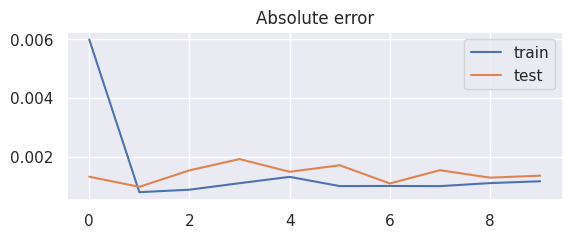

In [45]:
#Visualizamos la gráfica de 'MAE' entrenada y validada
from matplotlib import pyplot

pyplot.subplot(211)
pyplot.title('Absolute error')
pyplot.plot(history4.history['MAE'], label='train')
pyplot.plot(history4.history['val_MAE'], label='test')
pyplot.legend()

In [46]:
# evaluamos el modelo
_, mae_tr= model4.evaluate(x_train, y_train)
_, mae_ts= model4.evaluate(x_test, y_test)
print('MAE train: %.5f' % mae_tr)
print('MAE test: %.5f' % mae_ts)

605/605 [==============================] - 27s 45ms/step - loss: 1.0576e-04 - MAE: 0.0017
MAE train: 0.00083
MAE test: 0.00167


Vamos a comparar los valores de 'MAE train' y 'MAE test' de los 4 modelos.
Si ordenáramos de mejor modelo a peor, el orden sería:

    1- Red GRU
    2- Red LSTM
    3- Red Recurrente Simple
    4- Red Recurrente Simple con Dropout